In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Load Dataset 1
data1 = pd.read_csv('1.csv')
data1 = data1.iloc[:, 1:]
data1.columns = data1.iloc[1]
data1 = data1[2:].apply(pd.to_numeric, errors='coerce')
data1.dropna(inplace=True)

In [3]:
# Define features (X) and target (y) for regression
X = data1.drop(columns=['JobSatisfaction'])
y = data1['JobSatisfaction']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the regression model
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)

# Make predictions
y_pred = reg_model.predict(X_test)

# Evaluate the regression model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Regression Results: MSE = {mse}, R^2 = {r2}")

Regression Results: MSE = 0.7570730900294163, R^2 = 0.5488646124294875


MSE (0.757): The Mean Squared Error measures how far off the model's predictions are from the actual values. The lower the MSE, the better the model is at predicting job satisfaction. This value suggests that the model is performing moderately well.

R^2 (0.549): This tells you how much of the variance in job satisfaction is explained by the model. A value of 0.549 means that about 55% of the variance in job satisfaction is captured by the model, which is a decent result. However, there is still room for improvement.

In [4]:
# Load Dataset 2
data2 = pd.read_csv('2.csv')
data2.columns = data2.iloc[1]
data2 = data2[2:].apply(pd.to_numeric, errors='coerce')
data2.dropna(inplace=True)

# Define features (X) and target (y) for classification
X_class = data2.drop(columns=['IntentionCode'])
y_class = data2['IntentionCode']

# Split data into training and testing sets
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.3, random_state=42
)

# Train Random Forest model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train_class, y_train_class)

# Make predictions
y_pred_class = clf.predict(X_test_class)

# Evaluate the classification model
accuracy = accuracy_score(y_test_class, y_pred_class)
f1 = f1_score(y_test_class, y_pred_class, average='weighted')

print(f"Classification Results: Accuracy = {accuracy}, F1 Score = {f1}")

Classification Results: Accuracy = 0.9028571428571428, F1 Score = 0.902952415200609


Accuracy (90.3%): This is a high accuracy, meaning that the classification model is making correct predictions for employee turnover intentions most of the time.

F1 Score (0.903): The F1 score balances precision and recall, and a value of 0.903 indicates that the model has both good precision and recall, which is ideal for predicting employee turnover.

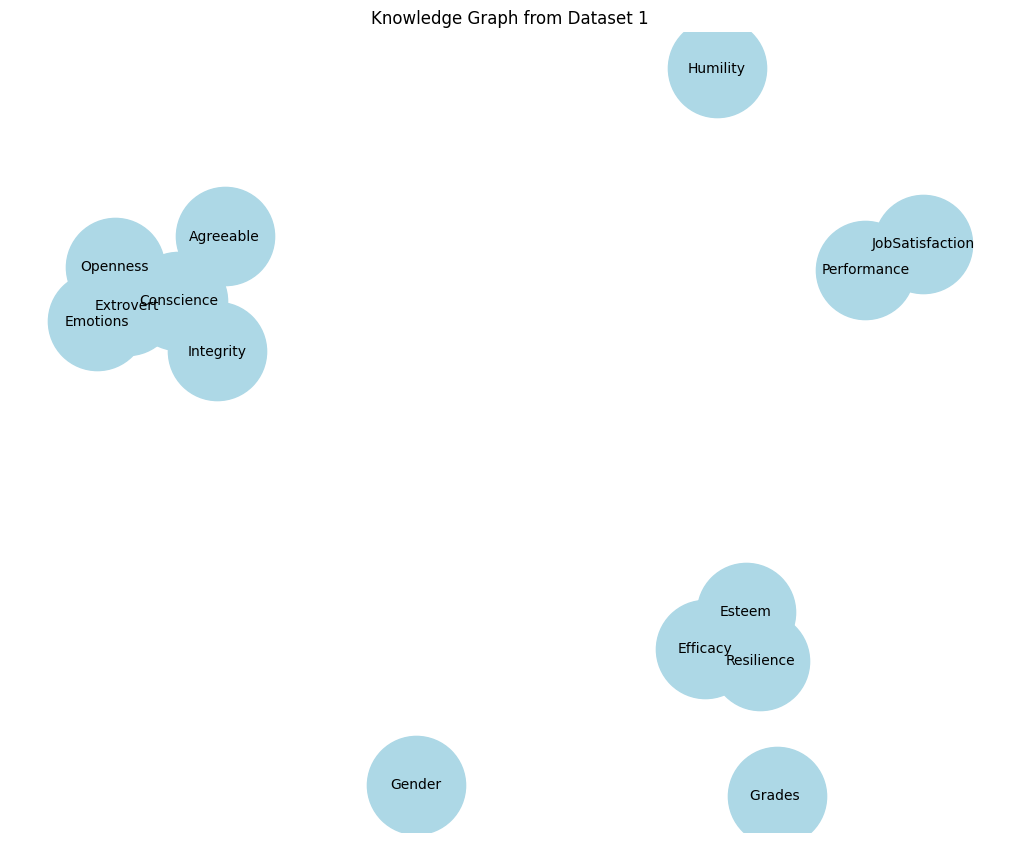

Clustering Coefficients: {'Gender': 0, 'Integrity': 0, 'Efficacy': 1.0, 'Humility': 0, 'Esteem': 1.0, 'Resilience': 1.0, 'Extrovert': 1.0, 'Agreeable': 0, 'Conscience': 0.3, 'Emotions': 1.0, 'Openness': 1.0, 'Performance': 0, 'Grades ': 0, 'JobSatisfaction': 0}


In [5]:
# Create correlation matrix for Dataset 1
correlation_matrix = data1.corr()

# Create a graph based on the correlation matrix
G = nx.Graph()

# Add nodes (features from the dataset)
for column in data1.columns:
    G.add_node(column)

# Add edges between features that have correlation > 0.5
for i in range(len(correlation_matrix.columns)):
    for j in range(i + 1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > 0.5:
            G.add_edge(correlation_matrix.columns[i], correlation_matrix.columns[j],
                       weight=correlation_matrix.iloc[i, j])

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=5000, node_color="lightblue", font_size=10)
plt.title("Knowledge Graph from Dataset 1")
plt.show()

# Clustering coefficients analysis
clustering_coefficients = nx.clustering(G)
print("Clustering Coefficients:", clustering_coefficients)

The clustering coefficients provide insight into how different features influence clustering behavior:
Features with coefficients of 1.0 like Efficacy, Esteem, Resilience, Extrovert, Emotions, and Openness are highly influential in clustering, meaning that they significantly differentiate between employee groups.
Features with coefficients of 0 like Gender, Integrity, Performance, and Grades do not significantly contribute to the clusters.

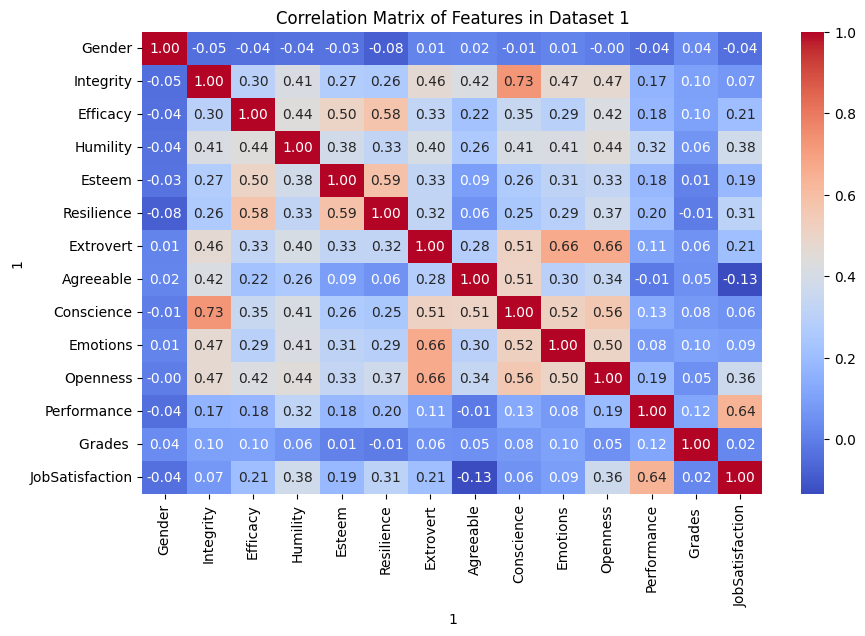

In [6]:
# Correlation matrix visualization for Dataset 1
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features in Dataset 1')
plt.show()

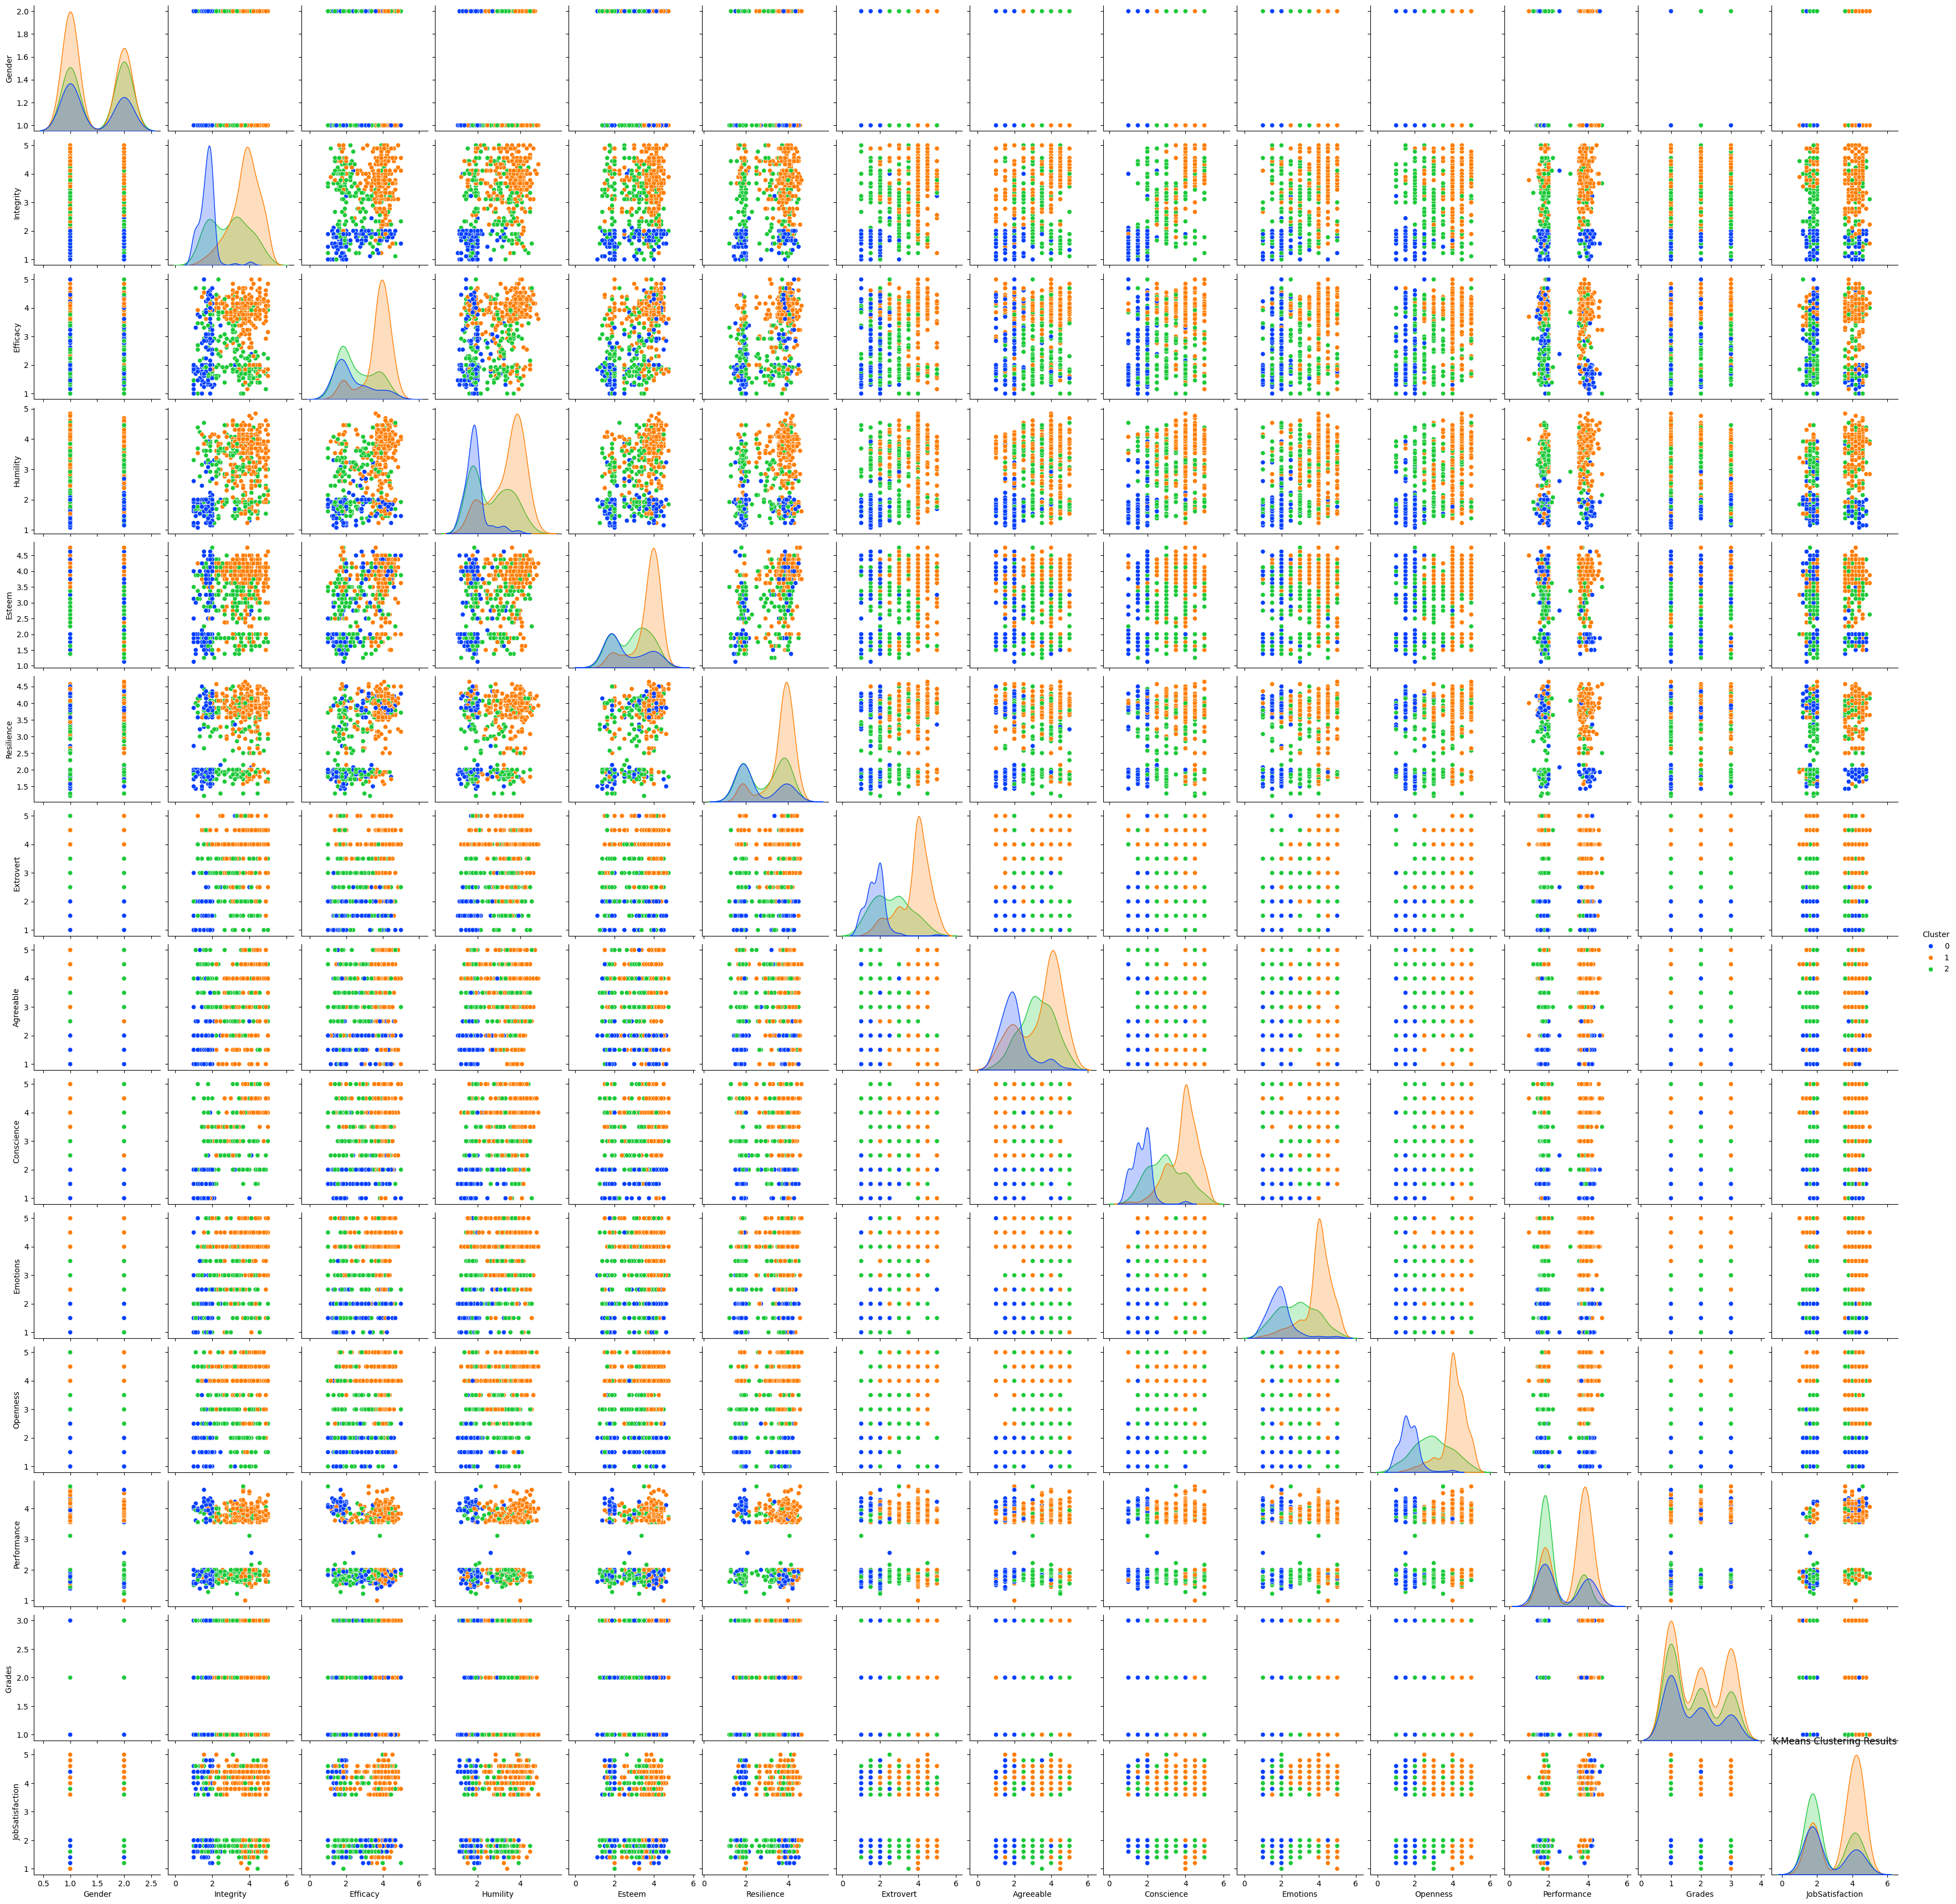

In [7]:
# Perform K-Means clustering on Dataset 1 (scaled)
kmeans = KMeans(n_clusters=3, random_state=42)
data1['Cluster'] = kmeans.fit_predict(X)

# Visualize the clustering results
sns.pairplot(data1, hue='Cluster', diag_kind='kde', palette='bright')
plt.title('K-Means Clustering Results')
plt.show()

<ipython-input-10-37336bbac6a6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=clustering_coefficients, palette='viridis')


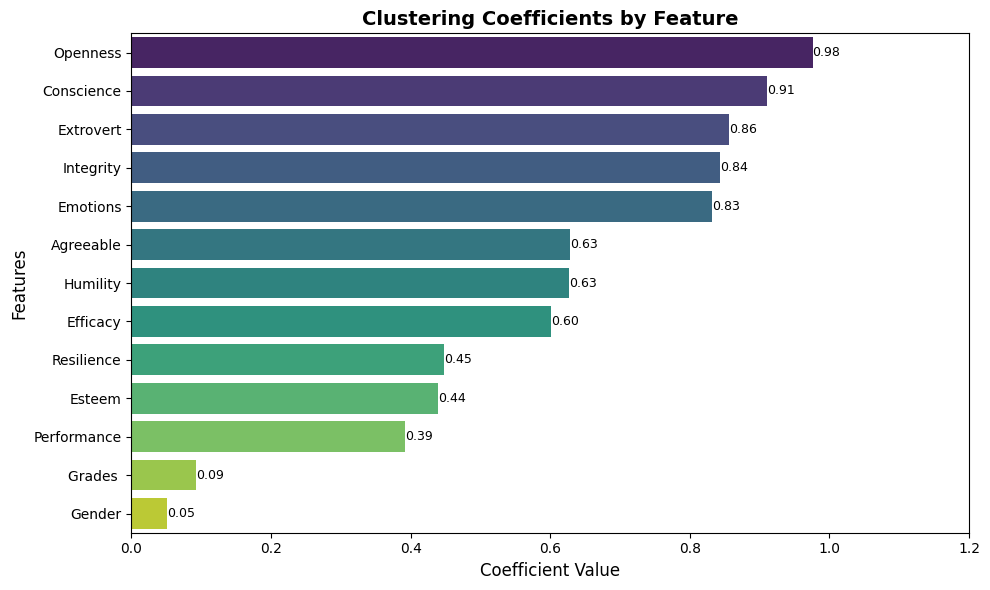

In [10]:
import numpy as np

# Clustering coefficients bar chart (calculated dynamically)
feature_coefficients = np.std(kmeans.cluster_centers_, axis=0)

# Ensure 'Feature' and 'Coefficient' have the same length
# We will only use features that were used in clustering for the coefficients
clustering_features = X.columns  # Features used in clustering
clustering_coefficients = pd.DataFrame({
    'Feature': clustering_features,  # Use clustering features
    'Coefficient': feature_coefficients
})

clustering_coefficients = clustering_coefficients.sort_values(by='Coefficient', ascending=False)

# Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=clustering_coefficients, palette='viridis')

# Add annotations for clarity
for index, value in enumerate(clustering_coefficients['Coefficient']):
    plt.text(value + 0.02, index, f'{value:.2f}', ha='center', va='center', fontsize=9)

plt.title('Clustering Coefficients by Feature', fontsize=14, weight='bold')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.xlim(0, 1.2)
plt.tight_layout()
plt.show()

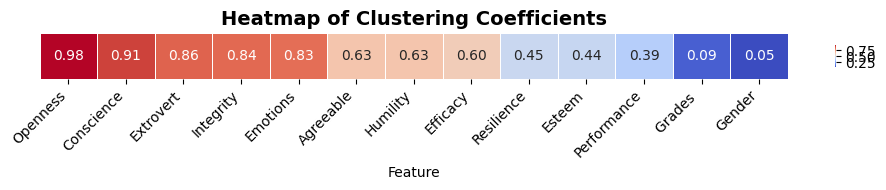

In [11]:
# Heatmap of clustering coefficients
coeff_matrix = pd.DataFrame([clustering_coefficients.set_index('Feature')['Coefficient']])

plt.figure(figsize=(10, 2))
sns.heatmap(coeff_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar_kws={'shrink': 0.5}, linewidths=0.5)

plt.title('Heatmap of Clustering Coefficients', fontsize=14, weight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks([])
plt.tight_layout()
plt.show()

In [12]:
# Save the clustering coefficients plot
plt.savefig('clustering_coefficients_bar_chart.png', dpi=300, bbox_inches='tight')

# Save the heatmap
plt.savefig('clustering_coefficients_heatmap.png', dpi=300, bbox_inches='tight')

<Figure size 640x480 with 0 Axes>